In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
data_path = '../results/'
result_txts = os.listdir(data_path)
result_txts

['ame_validation_result.txt']

In [112]:
def remove_new_lines(text):
    return text.split()

In [113]:
columns = ['language', 'seed', 'dim', 'max_step','warmup_steps', 'Tag_location',
           'n_layer', 'batch', 'copy', 'lr', 'dropout', 'acc', 'f1', 'bleu', 'char_acc']

numerics = ['seed', 'dim', 'max_step', 'warmup_steps', 'n_layer', 'batch', 'lr', 'dropout'
           ,'acc', 'f1', 'bleu', 'char_acc']
rows = []
for file in result_txts:
    with open(data_path+file) as f:
        lines = f.readlines()
    lines = list(chunks(lines, 16))
    for to_split in range(len(lines)):
        test = list(map(remove_new_lines,lines[to_split]))
        row = []
        for idx, datum in enumerate(test):
            if idx == 14:
                row.append(datum[2])
            elif idx == 15:
                pass
            else:
                row.append(datum[1])
        rows.append(row)
    

In [114]:
df = pd.DataFrame(rows, columns = columns)

In [115]:
# convert numerics to numerics
for numeric in numerics:
    df[numeric] = df[numeric].astype(np.float16)

In [116]:
df.head()

,language,seed,dim,max_step,warmup_steps,Tag_location,n_layer,batch,copy,lr,dropout,acc,f1,bleu,char_acc
0,ame,0.0,128.0,2000.0,1000.0,prepend,4.0,20.0,True,1.0,0.099976,0.817871,0.982910,0.930176,0.918457
1,ame,0.0,128.0,2000.0,1000.0,prepend,6.0,20.0,True,1.0,0.099976,0.736816,0.973145,0.902344,0.873535
2,ame,0.0,128.0,2000.0,1000.0,prepend,12.0,20.0,True,1.0,0.099976,0.540527,0.946777,0.818848,0.827637
3,ame,0.0,128.0,2000.0,1000.0,prepend,4.0,20.0,True,1.0,0.300049,0.854492,0.986816,0.953125,0.932617
4,ame,0.0,128.0,2000.0,1000.0,prepend,6.0,20.0,True,1.0,0.300049,0.579590,0.958496,0.857910,0.842285


In [133]:
plt.style.use("dark_background")

<AxesSubplot:xlabel='n_layer', ylabel='acc'>

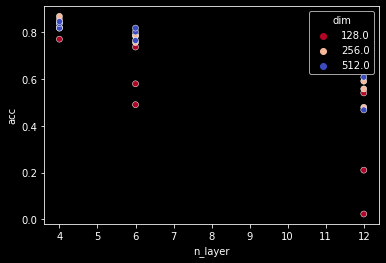

In [144]:
sns.scatterplot(x="n_layer", y="acc", data=df, hue='dim', palette='coolwarm_r')

<AxesSubplot:xlabel='n_layer', ylabel='acc'>

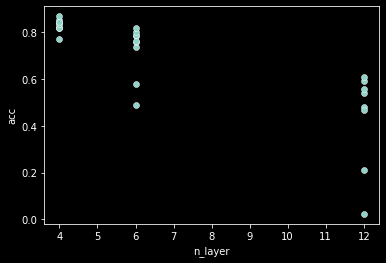

In [148]:
sns.scatterplot(x="n_layer", y="acc", data=df, palette='coolwarm_r')

<AxesSubplot:xlabel='dim', ylabel='acc'>

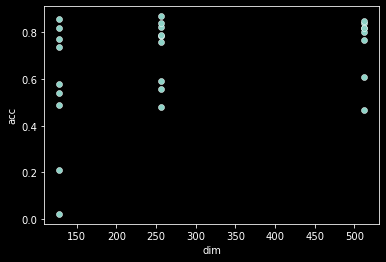

In [147]:
sns.scatterplot(x="dim", y="acc", data=df, palette='coolwarm_r')

<AxesSubplot:xlabel='acc', ylabel='Count'>

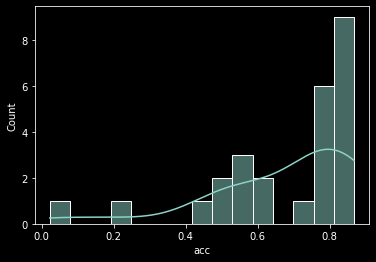

In [150]:
sns.histplot(df['acc'], kde=True, bins=15)

<AxesSubplot:xlabel='dim', ylabel='acc'>

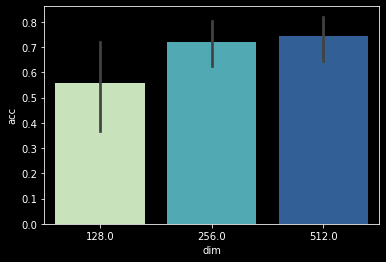

In [163]:
sns.barplot(x="dim", y="acc", data=df, palette="YlGnBu")

<AxesSubplot:xlabel='n_layer', ylabel='acc'>

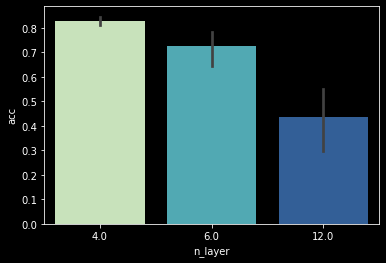

In [164]:
sns.barplot(x="n_layer", y="acc", data=df, palette="YlGnBu")

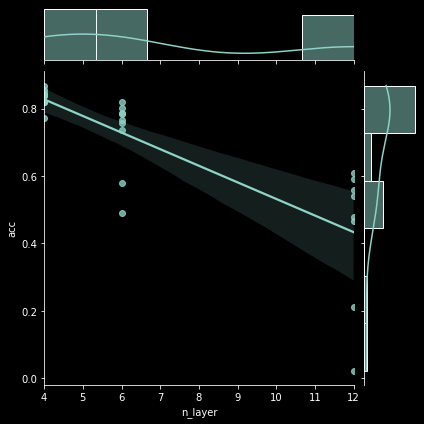

In [166]:
sns.jointplot(x='n_layer', y="acc", data=df, kind="reg")

In [161]:
print('Max')
print(df.iloc[df['acc'].argmax()])
print('-'*10)
print('Min')
print(df.iloc[df['acc'].argmin()])


Max
language             ame
seed                 0.0
dim                256.0
max_step          2000.0
warmup_steps      1000.0
Tag_location     prepend
n_layer              4.0
batch               20.0
copy                True
lr                   1.0
dropout         0.399902
acc             0.868164
f1              0.989746
bleu            0.955566
char_acc        0.933105
Name: 15, dtype: object
----------
Min
language             ame
seed                 0.0
dim                128.0
max_step          2000.0
warmup_steps      1000.0
Tag_location     prepend
n_layer             12.0
batch               20.0
copy                True
lr                   1.0
dropout         0.399902
acc             0.022415
f1              0.836426
bleu            0.409912
char_acc        0.350342
Name: 8, dtype: object
